Data shape: (110, 20)

Columns: ['title', 'comapnyURL1', 'comapnyURL2', 'companyId', 'companyUniversalName', 'companyName', 'salaryInsights', 'applicants', 'formattedLocation', 'formattedEmploymentStatus', 'formattedExperienceLevel', 'formattedIndustries', 'jobDescription', 'inferredBenefits', 'jobFunctions', 'workplaceTypes', 'company_data', 'companyApplyUrl', 'jobPostingUrl', 'listedAt']

Sample data:


,title,comapnyURL1,comapnyURL2,companyId,companyUniversalName,companyName,salaryInsights,applicants,formattedLocation,formattedEmploymentStatus,formattedExperienceLevel,formattedIndustries,jobDescription,inferredBenefits,jobFunctions,workplaceTypes,company_data,companyApplyUrl,jobPostingUrl,listedAt
0,Ingeniero de Datos (ETL-Datawarehouse),https://www.linkedin.com/company/1111615,https://www.linkedin.com/company/bdg-ca,1111615.0,bdg-ca,"Business Development Group, S.A.",NaN,22.0,"Guatemala, Guatemala, Guatemala",Full-time,NaN,NaN,Estamos buscando nuestro próximo Ingeniero de ...,NaN,IT,['Hybrid'],"{'name': 'Business Development Group, S.A.', '...",NaN,https://www.linkedin.com/jobs/view/4014007778/...,2024-08-30 22:50:57+00:00
1,Analista de Integridad de Datos,https://www.linkedin.com/company/76975908,https://www.linkedin.com/company/navaru-soluci...,76975908.0,navaru-soluciones-empresariales,NAVARU SOLUCIONES EMPRESARIALES,NaN,7.0,"Guatemala, Guatemala, Guatemala",Full-time,Mid-Senior level,Outsourcing and Offshoring Consulting,Conocimientos en soporte técnico y funcionamie...,NaN,IT,['On-site'],"{'name': 'NAVARU SOLUCIONES EMPRESARIALES ', '...",https://www.unmejorempleo.com.gt/empleo-en_gua...,https://www.linkedin.com/jobs/view/3996923232/...,2024-08-13 02:22:48+00:00
2,Jefe de ciencia de datos,https://www.linkedin.com/company/253356,https://www.linkedin.com/company/baccredomatic,253356.0,baccredomatic,BAC,NaN,74.0,"Guatemala, Guatemala",Full-time,Mid-Senior level,"Banking, Data Infrastructure and Analytics",Objetivo del Puesto:Liderar el equipo de Estra...,NaN,"ENG, RSCH, STRA",['On-site'],"{'name': 'BAC', 'logo': 'https://media.licdn.c...",NaN,https://www.linkedin.com/jobs/view/4001749423/...,2024-08-14 20:42:47+00:00
3,Administrador de bases de datos SQL Server,https://www.linkedin.com/company/96245076,https://www.linkedin.com/company/inversiones-c...,96245076.0,inversiones-centroamericanas-s-a,"Inversiones Centroamericanas, S. A.",NaN,46.0,"Santa Catarina Pinula, Guatemala, Guatemala",Full-time,NaN,NaN,“Velar por la óptima administración de la plat...,NaN,IT,['On-site'],"{'name': 'Inversiones Centroamericanas, S. A.'...",NaN,https://www.linkedin.com/jobs/view/4005140200/...,2024-08-21 22:33:38+00:00
4,Especialista en Estándares de Datos Abiertos e...,https://www.linkedin.com/company/90068,https://www.linkedin.com/company/dexis-consult...,90068.0,dexis-consulting-group,Dexis Consulting Group,NaN,35.0,"Guatemala City, Guatemala, Guatemala",Full-time,Mid-Senior level,International Trade and Development,Dexis is a professional services firm that sol...,NaN,OTHR,['Hybrid'],"{'name': 'Dexis Consulting Group', 'logo': 'ht...",https://dexisonline.com/jobs/?gh_jid=4455393005,https://www.linkedin.com/jobs/view/3997637934/...,2024-08-31 10:00:28+00:00


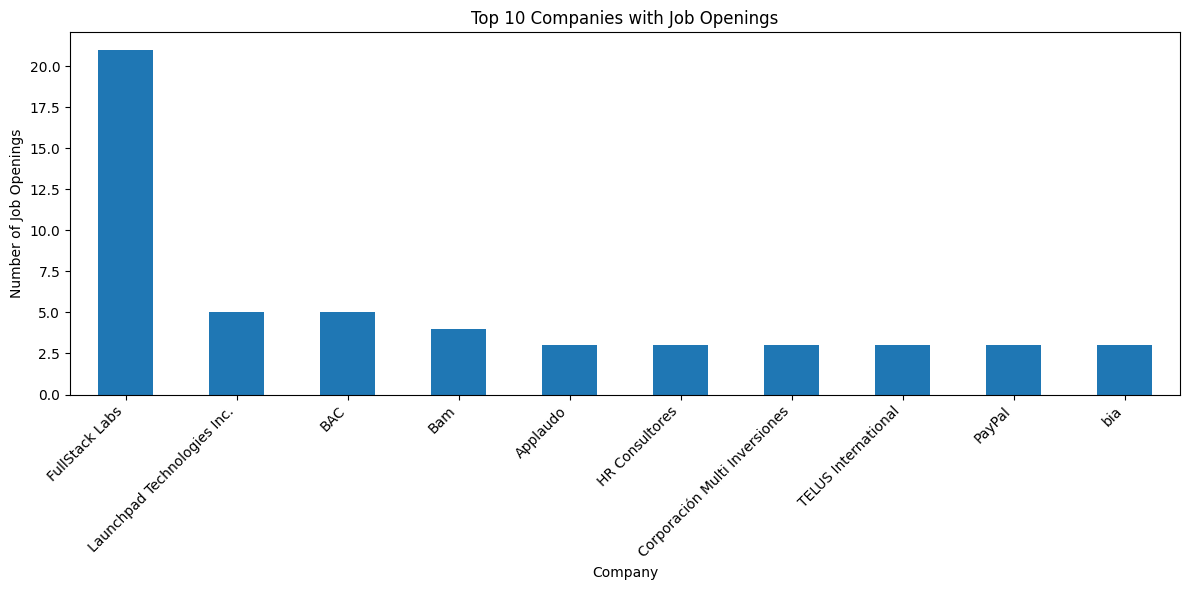

Total number of jobs: 110

Top 5 companies with most job openings:
companyName
FullStack Labs                 21
Launchpad Technologies Inc.     5
BAC                             5
Bam                             4
Applaudo                        3
Name: count, dtype: int64


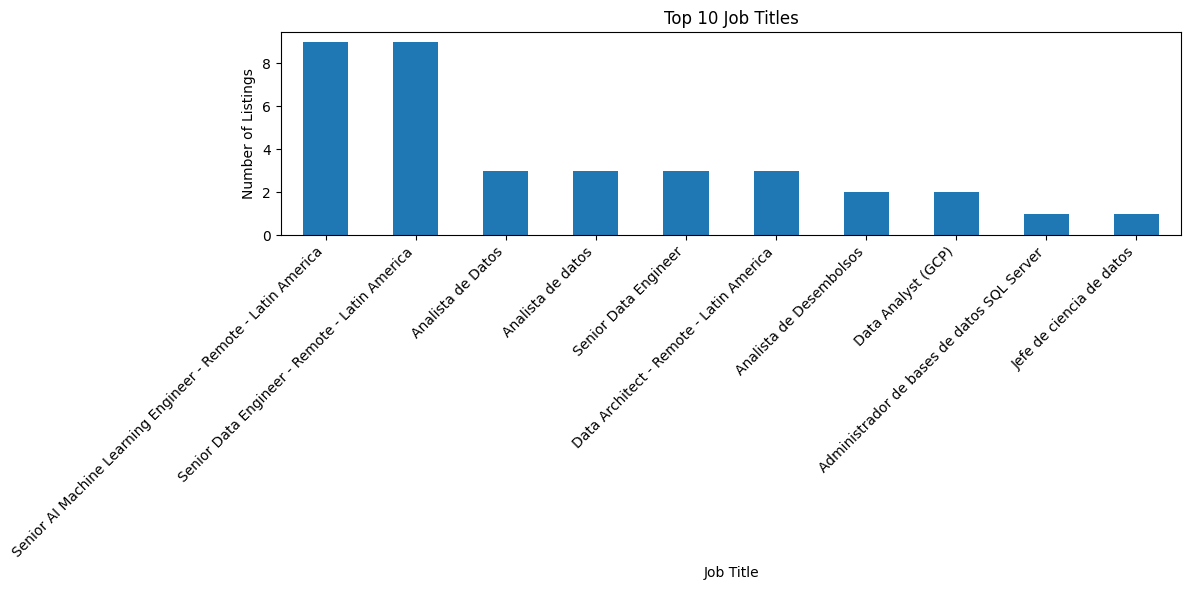


Top 5 job titles:
title
Senior AI Machine Learning Engineer - Remote - Latin America    9
Senior Data Engineer - Remote - Latin America                   9
Analista de Datos                                               3
Analista de datos                                               3
Senior Data Engineer                                            3
Name: count, dtype: int64


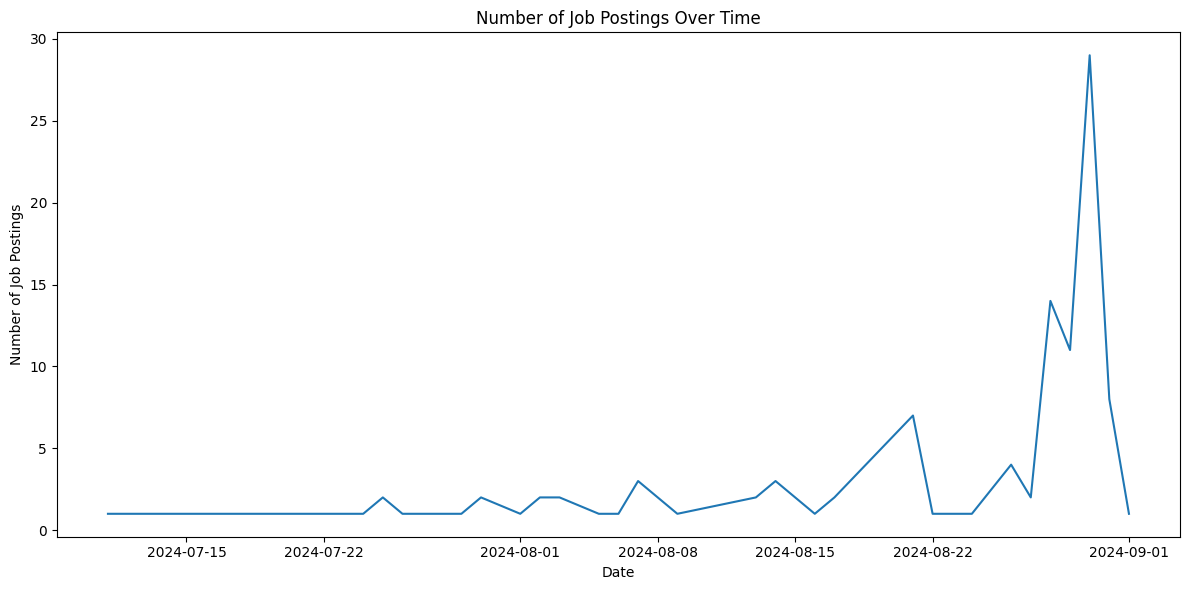

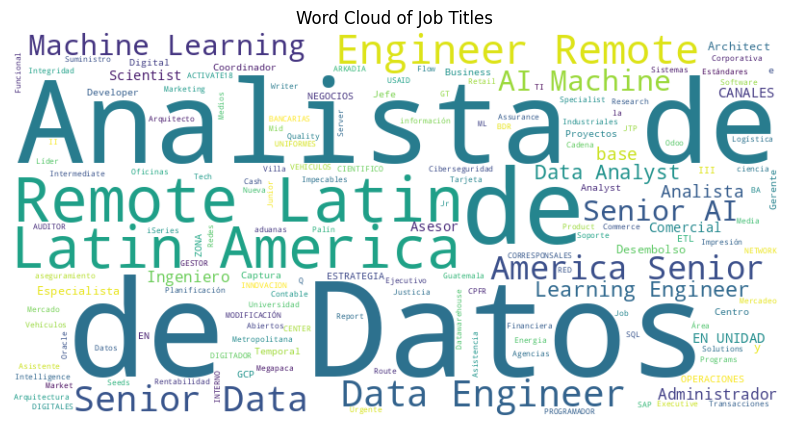

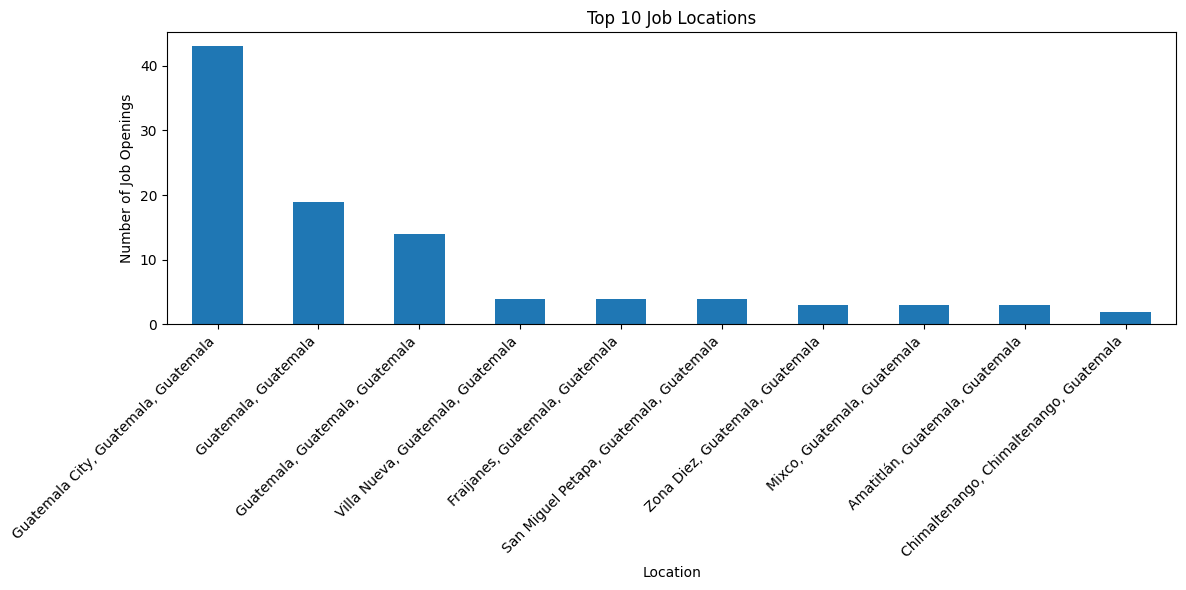


Top 5 job locations:
formattedLocation
Guatemala City, Guatemala, Guatemala    43
Guatemala, Guatemala                    19
Guatemala, Guatemala, Guatemala         14
Villa Nueva, Guatemala, Guatemala        4
Fraijanes, Guatemala, Guatemala          4
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pytz

# Load the data
df = pd.read_csv("linkedin_jobs.csv")

# Convert 'listedAt' to datetime and filter for last 2 months
df['listedAt'] = pd.to_datetime(df['listedAt'])
two_months_ago = datetime.now(pytz.UTC) - timedelta(days=60)
df = df[df['listedAt'] > two_months_ago]

# Save the filtered DataFrame to CSV
df.to_csv("linkedin_jobs_last_2_months.csv", index=False)

print("Data shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample data:")
display(df.head())

# Count jobs by company
company_counts = df['companyName'].value_counts()

# Plot a bar chart of top 10 companies
plt.figure(figsize=(12, 6))
company_counts.head(10).plot(kind='bar')
plt.title("Top 10 Companies with Job Openings")
plt.xlabel("Company")
plt.ylabel("Number of Job Openings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_companies.png")
plt.show()

# Print some statistics
print("Total number of jobs:", len(df))
print("\nTop 5 companies with most job openings:")
print(company_counts.head())

# Job Titles Distribution
title_counts = df['title'].value_counts()

plt.figure(figsize=(12, 6))
title_counts.head(10).plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 5 job titles:")
print(title_counts.head())

# Job Postings Over Time
df['listedDate'] = df['listedAt'].dt.date
daily_counts = df['listedDate'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title("Number of Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()

# Word Cloud of Job Titles
from wordcloud import WordCloud

text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

# Location Distribution
location_counts = df['formattedLocation'].value_counts()

plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar')
plt.title("Top 10 Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Job Openings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 5 job locations:")
print(location_counts.head())